In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#DATOS ALEATORIOS
np.random.seed(101)

x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

Text(0.5, 1.0, 'Datos Dispersos')

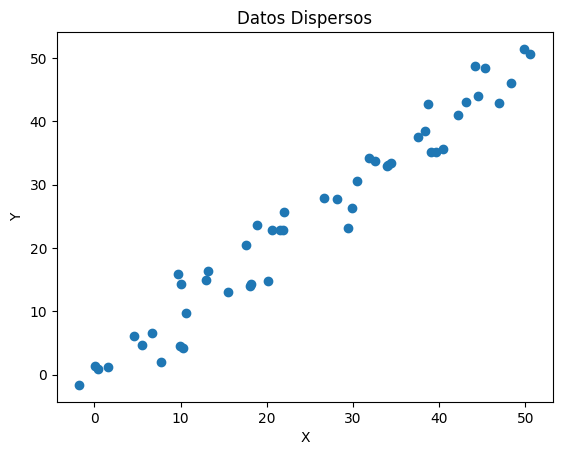

In [ ]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos Dispersos')

In [ ]:
#CARACTERISTICAS
x[0]

0.13118902161956925

In [ ]:
#VALOR REAL
y[0]

1.4454221454108707

In [ ]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [ ]:
#RSQUARED
model.score(x.reshape(-1, 1), y)

0.9583420208449781

In [ ]:
#PREDICCIONES
y_pred = model.predict(x.reshape(-1, 1))
y_pred

array([ 0.09164261,  1.52845925, -1.74821593,  0.39016488,  5.45803274,
        7.64044936,  4.48438649, 10.12827338,  9.77647218,  6.58347133,
       10.47019162,  9.88110925,  9.54376683, 15.32248864, 17.7519472 ,
       12.96641523, 12.79855843, 17.91567146, 19.91494534, 17.34505753,
       21.58563891, 21.27042875, 18.56913164, 20.28344738, 21.67940246,
       29.06738055, 26.33234355, 27.79962541, 30.0405961 , 29.52451899,
       33.46579081, 33.64215382, 31.45025115, 32.09649102, 37.81154319,
       34.00499715, 39.13381563, 39.86659786, 38.56613529, 42.61105625,
       37.09697447, 38.14998712, 43.88880525, 46.39010554, 41.62203785,
       43.54677545, 47.69135424, 44.68340027, 49.93549462, 49.25442596])

In [ ]:
#METRICAS DE EVALUACION
RMSE = np.sqrt(mean_squared_error(y_pred, y))
RMSE

3.103165347211001

Text(0.5, 1.0, 'Regresion Lineal Ajustada')

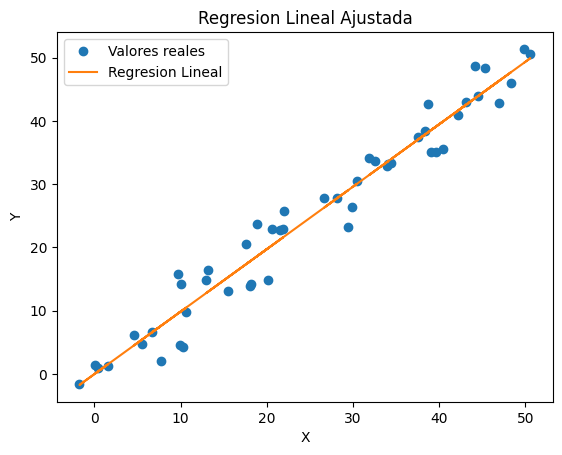

In [ ]:
#PLOTEO DE LA LINEA
plt.plot(x, y, 'o', label = 'Valores reales')
plt.plot(x, y_pred, label = 'Regresion Lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Regresion Lineal Ajustada')

In [ ]:
Advertising = pd.read_csv('../input/advertising-dataset/advertising.csv')
Advertising.shape

(200, 4)

In [ ]:
Advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


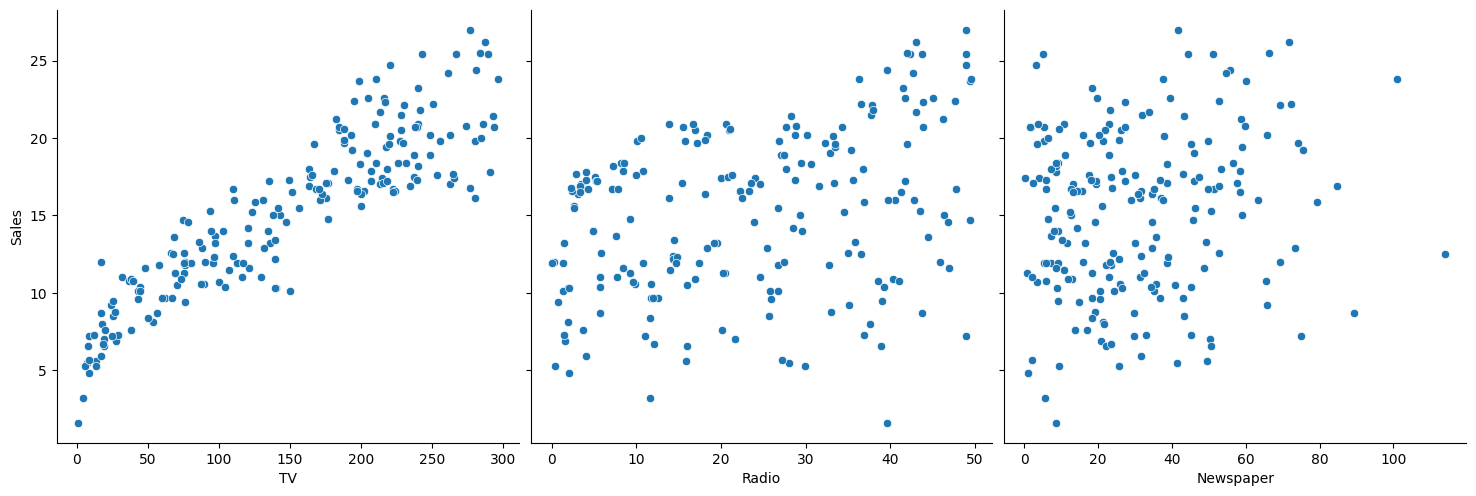

In [ ]:
sns.pairplot(Advertising, x_vars = ['TV', 'Radio', 'Newspaper'],
            y_vars = ['Sales'], height = 5, aspect = 1)

<Axes: >

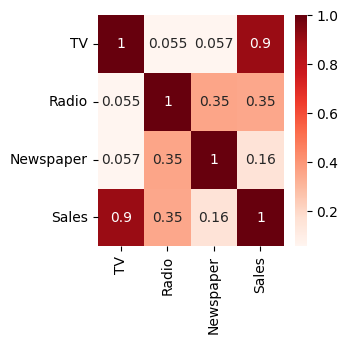

In [ ]:
m = Advertising.loc[:, 'TV':].corr()
plt.figure(figsize = (3, 3))
sns.heatmap(m, annot= True, cmap = 'Reds')

In [ ]:
#20% PARA TEST DEL DATASET
X_train, X_test, Y_train, Y_test = train_test_split(
Advertising.loc[:, ['TV', 'Radio', 'Newspaper']], Advertising.loc[:, 'Sales'],
    test_size = 0.2, random_state = 4 )

In [ ]:
X_train

,TV,Radio,Newspaper
26,142.9,29.3,12.6
134,36.9,38.6,65.6
180,156.6,2.6,8.3
158,11.7,36.9,45.2
189,18.7,12.1,23.4
...,...,...,...
104,238.2,34.3,5.3
129,59.6,12.0,43.1
183,287.6,43.0,71.8
174,222.4,3.4,13.1


In [ ]:
X_test

,TV,Radio,Newspaper
11,214.7,24.0,4.0
99,135.2,41.7,45.9
128,220.3,49.0,3.2
175,276.9,48.9,41.8
1,44.5,39.3,45.1
111,241.7,38.0,23.2
90,134.3,4.9,9.3
177,170.2,7.8,35.2
88,88.3,25.5,73.4
187,191.1,28.7,18.2


In [ ]:
Y_train

26     15.0
134    10.8
180    15.5
158     7.3
189     6.7
       ... 
104    20.7
129     9.7
183    26.2
174    16.5
122    16.6
Name: Sales, Length: 160, dtype: float64

In [ ]:
#MODELO
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.8992885230417469

In [ ]:
#RSQUARED
model.score(X_test, Y_test)

0.9046414171169503

In [ ]:
#PREDICT TEST
Y_pred = model.predict(X_test)

In [ ]:
#RMSE TEST / ERRRO CUADRATICO MEDIO
RMSE = np.sqrt(mean_squared_error(Y_pred, Y_test))
RMSE

1.4208893527926938

In [ ]:
#PREDECIR CON DATOS NUEVOS
input_data = pd.DataFrame([[100.0, 100.0, 50.0]], columns = ['TV', 'Radio', 'Newspaper'])
prediccion = model.predict(input_data)
print(prediccion)

[20.45740012]
